# Chapter 04: Principles of Data Visualization
## Prof. Leandro Nunes de Castro

In [ ]:
# This content was created as a supporting material for the book
# EXPLORATORY DATA ANALYSIS: Descriptive Analysis, Visualization and Dashboard Design (with codes in Python)
# authored by Leandro de Castro (c), 2023-2024
# All rights reserved

# Chapter 4 - Principles of Data Visualization

In [ ]:
# SUMMARY
# 0. Importing the Libraries and Loading the Chapter Data
# 1. Central Tendency and Dispersion Measures: One Variable at a Time
# 2. Central Tendency and Dispersion Measures: All Variables at Once
# 3. Association Measures
# 4. Analyzing Through Visualization
# Final challenge

##  0. Importing the Libraries and Loading the Chapter Data

In [336]:
import statistics as st # Built in Python library for descriptive statistics
import pandas as pd  # Data manipulation and analysis library
import researchpy as rp  # Open source library focused on univariate and bivariate analysis
import numpy as np  # General purpose array processing package
import seaborn as sns  # Data visualization library based on matplotlib
import matplotlib.pyplot as plt  # Data visualization library
import scipy.stats as spy  # Statistical library from Scipy
import statsmodels.api as sm  # Statistics and estimation library


In [21]:
# Libraries of Chapter 04
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import networkx as nx


In [1]:
# Loading dataset1
# https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass
# Missing Values? Yes
import pandas as pd

dmammo = pd.read_csv('mammographic_masses_nominal.csv')
dmammo.shape

(961, 6)

In [2]:
dmammo.head

<bound method NDFrame.head of     BI-RADS Age      Shape         Margin Density   Severity
0         5  67    Lobular     Spiculated     Low  Malignant
1         4  43      Round  Circumscribed       ?  Malignant
2         5  58  Irregular     Spiculated     Low  Malignant
3         4  28      Round  Circumscribed     Low     Benign
4         5  74      Round     Spiculated       ?  Malignant
..      ...  ..        ...            ...     ...        ...
956       4  47       Oval  Circumscribed     Low     Benign
957       4  56  Irregular     Spiculated     Low  Malignant
958       4  64  Irregular     Spiculated     Low     Benign
959       5  66  Irregular     Spiculated     Low  Malignant
960       4  62    Lobular       Obscured     Low     Benign

[961 rows x 6 columns]>

In [3]:
# Loading dataset2
# https://archive.ics.uci.edu/ml/datasets/forest+fires
# Missing Values? No
import pandas as pd

dforest = pd.read_csv('forestfires.csv')
dforest.shape

(517, 13)

In [4]:
dforest.head

<bound method NDFrame.head of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

## 4.1 Visual Processing 
### 4.1.1 Can't See the Forest for the Trees

Dataset  I
   dataset     x     y
0        I 10.00  8.04
1        I  8.00  6.95
2        I 13.00  7.58
3        I  9.00  8.81
4        I 11.00  8.33
5        I 14.00  9.96
6        I  6.00  7.24
7        I  4.00  4.26
8        I 12.00 10.84
9        I  7.00  4.82
10       I  5.00  5.68
Summary Measures for Dataset I:
Mean of x: 9.00
Mean of y: 7.50
Std of x: 3.16
Std of y: 1.94
Correlation between x and y: 0.82
Linear regression model: y = 3.00 + 0.50x

Dataset  II
   dataset     x    y
11      II 10.00 9.14
12      II  8.00 8.14
13      II 13.00 8.74
14      II  9.00 8.77
15      II 11.00 9.26
16      II 14.00 8.10
17      II  6.00 6.13
18      II  4.00 3.10
19      II 12.00 9.13
20      II  7.00 7.26
21      II  5.00 4.74
Summary Measures for Dataset II:
Mean of x: 9.00
Mean of y: 7.50
Std of x: 3.16
Std of y: 1.94
Correlation between x and y: 0.82
Linear regression model: y = 3.00 + 0.50x

Dataset  III
   dataset     x     y
22     III 10.00  7.46
23     III  8.00  6.77
24     III 1

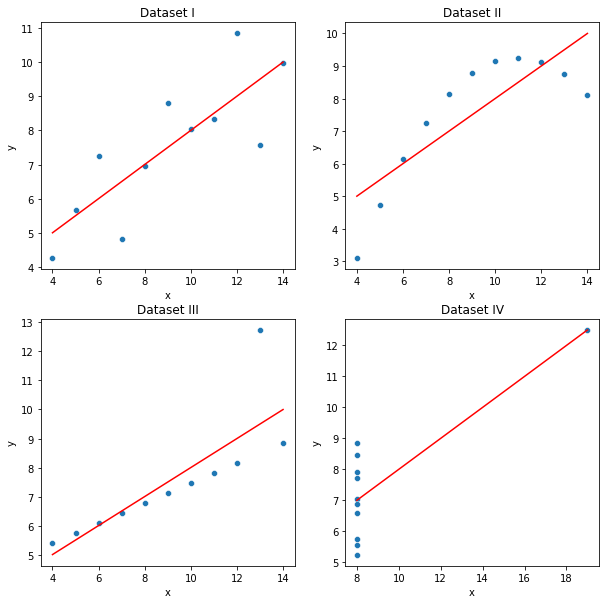

In [5]:
# Print the Anscombe's Quartet table with the summary measures (mean, std, corr, linear 
# regression) for each dataset and plot the scatterplots of each of the four datasets

import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Uses the Seaborn library to load the Anscombe's data 
danscombe = sns.load_dataset("anscombe")
pd.options.display.float_format = "{:.2f}".format

# Print the data and summary measures for each dataset
for dataset in ["I", "II", "III", "IV"]:
    df_subset = danscombe[danscombe.dataset == dataset]
    print(f"Dataset  {dataset}\n{df_subset}")
    print(f"Summary Measures for Dataset {dataset}:")
    print(f"Mean of x: {np.mean(df_subset.x):.2f}")
    print(f"Mean of y: {np.mean(df_subset.y):.2f}")
    print(f"Std of x: {np.std(df_subset.x):.2f}")
    print(f"Std of y: {np.std(df_subset.y):.2f}")
    print(f"Correlation between x and y: {np.corrcoef(df_subset.x, df_subset.y)[0,1]:.2f}")
    model = sm.OLS(df_subset.y, sm.add_constant(df_subset.x)).fit()
    print(f"Linear regression model: y = {model.params[0]:.2f} + {model.params[1]:.2f}x\n")

# Plot the scatterplots and regression lines for each dataset
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, dataset in enumerate(["I", "II", "III", "IV"]):
    df_subset = danscombe[danscombe.dataset == dataset]
    x = df_subset.x; y = df_subset.y
    model = sm.OLS(y, sm.add_constant(x)).fit()
    y_pred = model.predict(sm.add_constant(x))
    sns.scatterplot(x=x, y=y, ax=axes[i//2, i%2])
    sns.lineplot(x=x, y=y_pred, color="red", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Dataset {dataset}")
plt.show()

In [6]:
df = pd.read_csv("datasaurus_dozen.csv", delimiter=';')
df.head

<bound method NDFrame.head of          dataset     x     y
0           dino 55.38 97.18
1           dino 51.54 96.03
2           dino 46.15 94.49
3           dino 42.82 91.41
4           dino 40.77 88.33
...          ...   ...   ...
1841  wide_lines 33.67 26.09
1842  wide_lines 75.63 37.13
1843  wide_lines 40.61 89.14
1844  wide_lines 39.11 96.48
1845  wide_lines 34.58 89.59

[1846 rows x 3 columns]>

Summary Measures for Dataset dino:
Mean of x: 54.26
Mean of y: 47.83
Std of x: 16.71
Std of y: 26.84
Correlation between x and y: -0.06
Linear regression model: y = 53.45 + -0.10x

Summary Measures for Dataset away:
Mean of x: 54.27
Mean of y: 47.83
Std of x: 16.71
Std of y: 26.84
Correlation between x and y: -0.06
Linear regression model: y = 53.43 + -0.10x

Summary Measures for Dataset h_lines:
Mean of x: 54.26
Mean of y: 47.83
Std of x: 16.71
Std of y: 26.84
Correlation between x and y: -0.06
Linear regression model: y = 53.21 + -0.10x

Summary Measures for Dataset v_lines:
Mean of x: 54.27
Mean of y: 47.84
Std of x: 16.71
Std of y: 26.84
Correlation between x and y: -0.07
Linear regression model: y = 53.89 + -0.11x

Summary Measures for Dataset x_shape:
Mean of x: 54.26
Mean of y: 47.84
Std of x: 16.71
Std of y: 26.84
Correlation between x and y: -0.07
Linear regression model: y = 53.55 + -0.11x

Summary Measures for Dataset star:
Mean of x: 54.27
Mean of y: 47.84
Std of x: 16.71
S

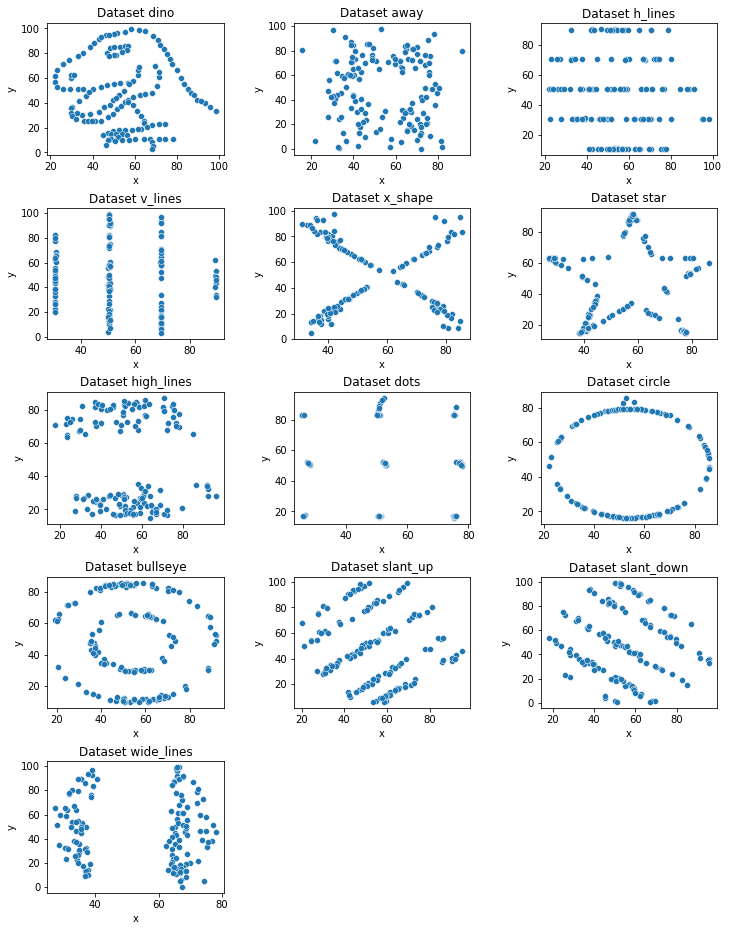

In [7]:
# Print the Datasaurus Dozen table with the summary measures (mean, std, corr, linear 
# regression) and plot the scatterplots of each dataset

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using Pandas
dsaurus = pd.read_csv("datasaurus_dozen.csv", delimiter=';')
pd.options.display.float_format = "{:.2f}".format

# Print the data and summary measures for each dataset
for dataset in dsaurus.dataset.unique():
    print(f"Summary Measures for Dataset {dataset}:")
    df_subset = dsaurus[dsaurus.dataset == dataset]
    print(f"Mean of x: {np.mean(df_subset.x):.2f}")
    print(f"Mean of y: {np.mean(df_subset.y):.2f}")
    print(f"Std of x: {np.std(df_subset.x):.2f}")
    print(f"Std of y: {np.std(df_subset.y):.2f}")
    print(f"Correlation between x and y: {np.corrcoef(df_subset.x, df_subset.y)[0, 1]:.2f}")
    model = sm.OLS(df_subset.y, sm.add_constant(df_subset.x)).fit()
    print(f"Linear regression model: y = {model.params[0]:.2f} + {model.params[1]:.2f}x")
    print("")

# Plot the scatterplots for each dataset
fig, axes = plt.subplots(5, 3, figsize=(12, 16))
for i, dataset in enumerate(dsaurus.dataset.unique()):
    df_subset = dsaurus[dsaurus.dataset == dataset]
    x = df_subset.x; y = df_subset.y
    sns.scatterplot(x=x, y=y, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Dataset {dataset}")
for i in range(len(dsaurus.dataset.unique()), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])  # Remove unused subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

### 4.1.2 Preattentive Processing 

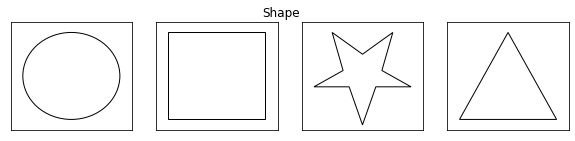

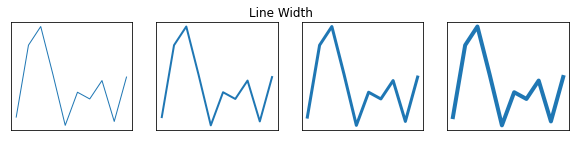

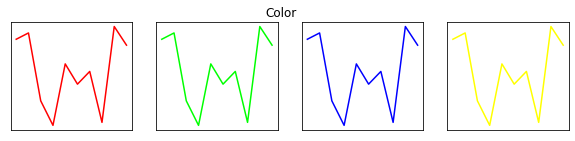

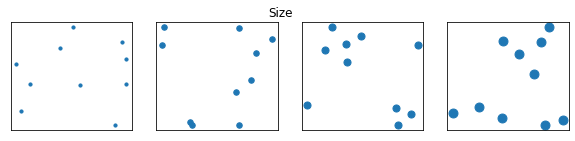

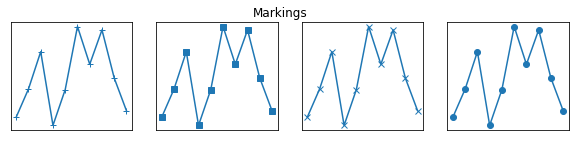

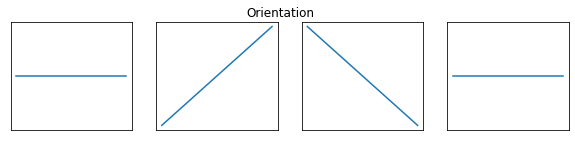

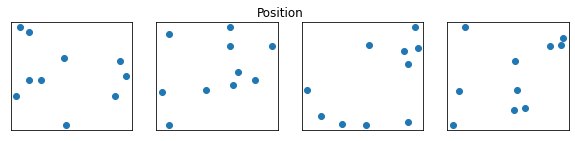

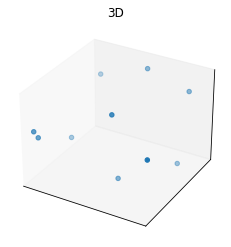

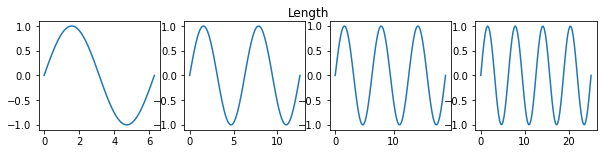

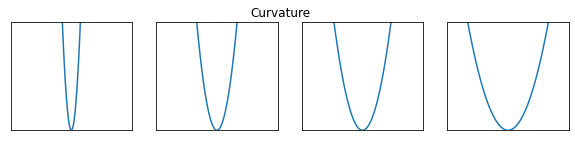

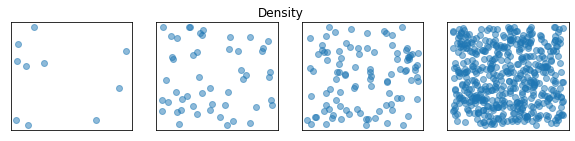

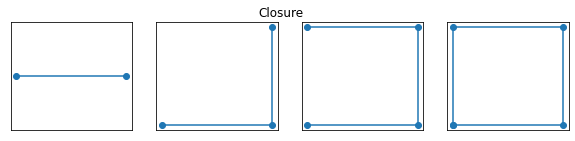

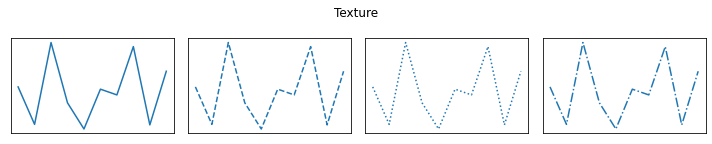

In [11]:
# Preattemptive Processing
# Code to generate illustrations of the following preattemptive processing:
# Shape, line width, color, size, markings, orientation, position, 3d,  
# length, curvature, density, closure, and texture

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
from mpl_toolkits.mplot3d import Axes3D

# Shape
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
shapes = ['circle', 'square', 'star', 'triangle']
for i, ax in enumerate(axs):
    shape = shapes[i]
    # Create shapes using patches
    if shape == 'circle':
        shape_obj = patches.Circle((0.5, 0.5), radius=0.4, fill=False)
    elif shape == 'square':
        shape_obj = patches.Rectangle((0.1, 0.1), 0.8, 0.8, fill=False)
    elif shape == 'star':
        x = [0.5, 0.61, 0.9, 0.66, 0.75, 0.5, 0.25, 0.34, 0.1, 0.39]
        y = [0.05, 0.4, 0.4, 0.55, 0.9, 0.7, 0.9, 0.55, 0.4, 0.4]
        shape_obj = patches.Polygon(np.column_stack((x, y)), closed=True, fill=False)
    elif shape == 'triangle':
        x = [0.1, 0.5, 0.9, 0.1]
        y = [0.1, 0.9, 0.1, 0.1]
        shape_obj = patches.Polygon(np.column_stack((x, y)), closed=True, fill=False)
    # Add the shape to the plot
    ax.add_patch(shape_obj)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([]); ax.set_yticks([])
plt.suptitle('Shape')

# Line Width
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
line_widths = [1, 2, 3, 4]
x = np.arange(10)
y = np.random.rand(10)
for ax, lw in zip(axs, line_widths):
    ax.plot(x, y, linewidth=lw)
    ax.set_xticks([]); ax.set_yticks([])
    #ax.set_title(f'Line width {lw}')
plt.suptitle('Line Width')

# Color
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
colors = [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0]]
x = np.arange(10)
y = np.random.rand(10)
for ax, c in zip(axs, colors):
    ax.plot(x, y, color=c)
    ax.set_xticks([]); ax.set_yticks([])
    #ax.set_title(f'Color {c}')
plt.suptitle('Color')

# Size
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
sizes = [10, 30, 50, 80]
for ax, s in zip(axs, sizes):
    ax.scatter(np.random.rand(10), np.random.rand(10), s=s)
    ax.set_xticks([]); ax.set_yticks([])
    #ax.set_title(f'Size {s}')
plt.suptitle('Size')

# Markings
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
marks = ['+', 's', 'x', 'o']
x = np.arange(10)
y = np.random.rand(10)
for ax, mark in zip(axs, marks):
    ax.plot(x, y, marker=mark)
    ax.set_xticks([]); ax.set_yticks([])
plt.suptitle('Markings')

# Orientation
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
orientations = [0, 45, 100, 0]
for ax, o in zip(axs, orientations):
    angle = np.deg2rad(o)
    x = np.array([0, np.cos(angle)])
    y = np.array([0, np.sin(angle)])
    ax.plot(x, y)
    ax.set_xticks([]); ax.set_yticks([])
    #ax.set_title(f'Orientation {o}')
plt.suptitle('Orientation')

# Position
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
for ax in axs:
    ax.scatter(np.random.rand(10), np.random.rand(10))
    ax.set_xticks([]); ax.set_yticks([])
plt.suptitle('Position')

# 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.random.rand(10), np.random.rand(10), np.random.rand(10))
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
ax.set_title('3D')

# Length
periods = [1, 2, 3, 4]
x_range = np.linspace(0, 2 * np.pi, 100)
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
# Plot sine waves with different numbers of periods in each subplot
for i, num_periods in enumerate(periods):
    x = np.linspace(0, num_periods * 2 * np.pi, 100)
    y = np.sin(x)
    axs[i].plot(x, y)
plt.suptitle('Length')

# Curvature
x = np.linspace(-2, 2, 100)
curvature_values = [0.1, 0.5, 1.0, 2.0]
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
common_xlim = (-3, 3)
common_ylim = (0, 1)
for i, curvature in enumerate(curvature_values):
    y = x**2 / (2 * curvature)
    axs[i].plot(x, y)
    axs[i].set_xlim(common_xlim)
    axs[i].set_ylim(common_ylim)
    axs[i].set_xticks([]); axs[i].set_yticks([])
plt.suptitle('Curvature')

# Density
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
densities = [10, 50, 100, 500]
for ax, d in zip(axs, densities):
    x = np.random.rand(d)
    y = np.random.rand(d)
    ax.scatter(x, y, alpha=0.5)
    ax.set_xticks([]); ax.set_yticks([])
    #ax.set_title(f'Density {d}')
plt.suptitle('Density')

# Closure
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
for i, ax in enumerate(axs):
    x = [0, 1, 1, 0][:i+2]
    y = [0, 0, 1, 1][:i+2]
    if i == 3:
        x = [0, 1, 1, 0, 0]
        y = [0, 0, 1, 1, 0]
        ax.plot(x, y, '-o')
        ax.set_xticks([]); ax.set_yticks([])
    else:
        ax.plot(x, y, '-o')
        ax.set_xticks([]); ax.set_yticks([])
plt.suptitle('Closure')

# Texture
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
lins = ['-', '--', ':', '-.']
x = np.arange(10)
y = np.random.rand(10)
for ax, lin in zip(axs, lins):
    ax.plot(x, y, linestyle=lin)
    ax.set_xticks([]); ax.set_yticks([])
plt.suptitle('Texture')

plt.tight_layout()
plt.show()

### 4.1.3 Gestalt Principles and Data Visualization Methods

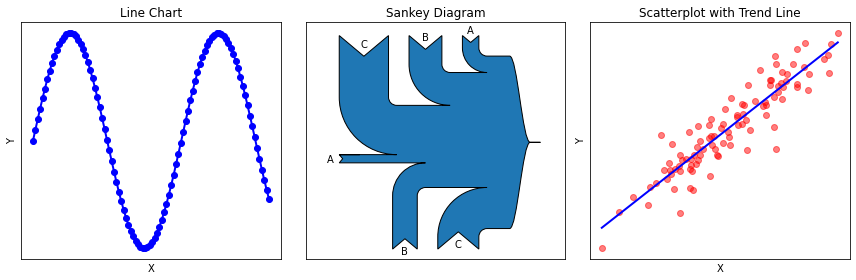

In [12]:
# 1. CONTINUITY GESTALT PRINCIPLE
# Code to illustrate the three cases of the Continuity Gestalt principle

from matplotlib.sankey import Sankey

# 1. Line chart connecting datapoints showing a continuous trend over time
x = np.linspace(0, 10, 100)
y = np.sin(x)
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].plot(x, y, 'o-', color='blue', linewidth=2)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_xticks([]); axs[0].set_yticks([])
axs[0].set_title('Line Chart')

# 2. Sankey diagram (flow chart) using a series of arrows to show the flow of data through a system
df = pd.DataFrame({'source': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'target': ['B', 'C', 'D', 'E', 'F', 'G'],
                   'value': [1, 2, 3, 4, 5, 6]})
sankey = Sankey(ax=axs[1], scale=0.1, unit=None)
sankey.add(flows=df['value'], labels=df['source'], orientations=[0, 1, -1, 1, -1, 1])
sankey.finish()
axs[1].set_xticks([]); axs[1].set_yticks([])
axs[1].set_title('Sankey Diagram')

# 3. Scatterplot with a trend line, indicating a connection or trend
np.random.seed(123)
x = np.random.randn(100)
y = 2*x + np.random.randn(100)
axs[2].scatter(x, y, color='red', alpha=0.5)
coefficients = np.polyfit(x, y, 1)
trendline_x = np.linspace(np.min(x), np.max(x), 100)
trendline_y = coefficients[0]*trendline_x + coefficients[1]
axs[2].plot(trendline_x, trendline_y, color='blue', linewidth=2)
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
axs[2].set_xticks([]); axs[2].set_yticks([])
axs[2].set_title('Scatterplot with Trend Line')

plt.tight_layout()
plt.show()


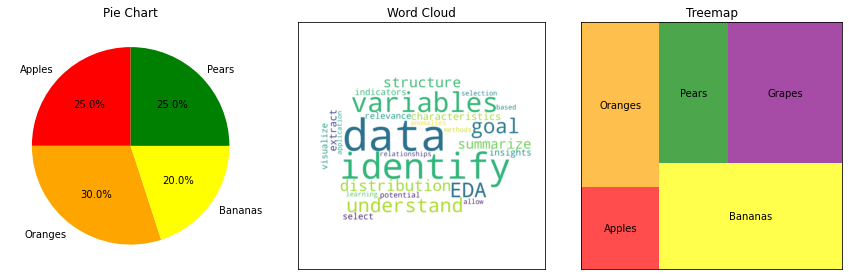

In [13]:
# 2. CLOSURE GESTALT PRINCIPLE
# Code to illustrate the three cases of the Closure Gestalt principle

from wordcloud import WordCloud  # Library specialized in the design of wordclouds
import squarify  # Library to create treemap charts
from PIL import Image  # library for opening, manipulating, and saving image files

# 1. Pie chart showing the closure of the pie
labels = ['Apples', 'Oranges', 'Bananas', 'Pears']
sizes = [25, 30, 20, 25]
colors = ['red','orange','yellow','green']
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
axs[0].set_title('Pie Chart')

# 2. Word cloud showing the cloud closed shape
text = 'The goal of EDA is to understand the distribution and structure of data, to summarize data characteristics, to extract insights and indicators from data, to identify relevance and/or select variables, to visualize potential relationships between variables, to identify anomalies, to allow the application and/or selection of learning-based methods'
mask = np.array(Image.open('comment.png'))
wordcloud = WordCloud(background_color='white', mask = mask).generate(text)
axs[1].imshow(wordcloud, interpolation='bilinear')
axs[1].set_xticks([]); axs[1].set_yticks([])
axs[1].set_title('Word Cloud')

# 3. Treemap
values = [10, 20, 30, 15, 25]
labels = ['Apples', 'Oranges', 'Bananas', 'Pears', 'Grapes']
colors = ['red','orange','yellow','green','purple']
squarify.plot(sizes=values, label=labels, color=colors, alpha=0.7, ax=axs[2])
axs[2].set_xticks([]); axs[2].set_yticks([])
axs[2].set_title('Treemap')

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()


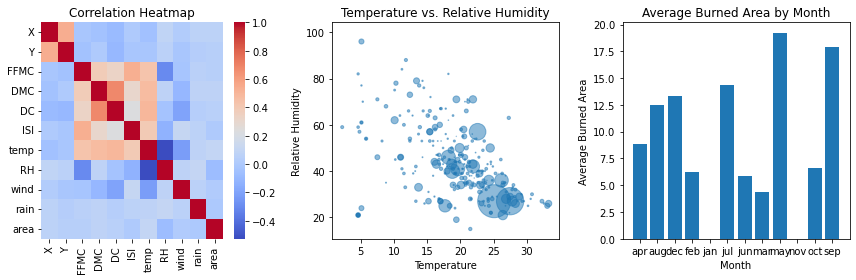

In [14]:
# 3. PROXIMITY GESTALT PRINCIPLE
# Code to illustrate three cases of the Proximity Gestalt principle with the UCI Forest Fires data

# Load dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

# 1. Heatmap showing neighboring regions with similar correlations in the map
fig, axs = plt.subplots(1, 3, figsize=(12,4))
sns.heatmap(data.corr(), cmap='coolwarm', ax=axs[0])
axs[0].set_title('Correlation Heatmap')

# 2. Scatter plot showing neighboring regions with similar burned area levels
axs[1].scatter(data['temp'], data['RH'], s=data['area'], alpha=0.5)
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Relative Humidity')
axs[1].set_title('Temperature vs. Relative Humidity')

# 3. Bar chart showing sets of months with burned areas
month_groups = data.groupby('month').mean()['area']
axs[2].bar(month_groups.index, month_groups)
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Average Burned Area')
axs[2].set_title('Average Burned Area by Month')

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()

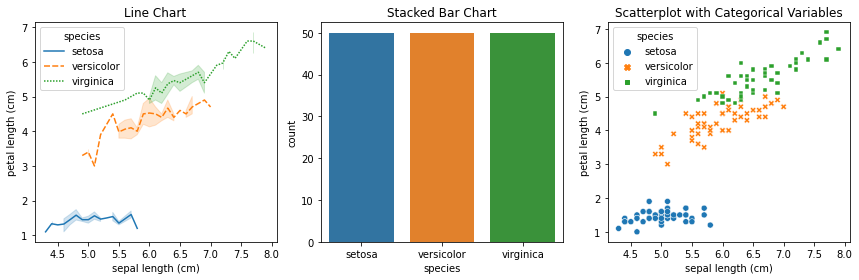

In [15]:
# 4. SIMILARITY GESTALT PRINCIPLE
# Code to illustrate three cases of the Similarity Gestalt principle 
# Iris dataset of Fischer available at the Scikitlearn library

from sklearn.datasets import load_iris
diris = load_iris()  # Load the Iris dataset from Scikitlearn

# 1. Line chart with lines representing different species having the same style
dfiris = pd.DataFrame(data= np.c_[diris['data'], diris['target']],
                        columns= diris['feature_names'] + ['target'])
dfiris['species'] = pd.Categorical.from_codes(diris.target, diris.target_names)
fig, axs = plt.subplots(1, 3, figsize=(12,4))
sns.lineplot(data=dfiris, x='sepal length (cm)', y='petal length (cm)', hue='species', style='species', ax=axs[0])
axs[0].set_title('Line Chart')

# 2. Stacked bar chart with bars having the same pattern for each species
sns.countplot(data=dfiris, x='species', ax=axs[1])
axs[1].set_title('Stacked Bar Chart')

# 3. Scatterplot with different markers representing different species
sns.scatterplot(data=dfiris, x='sepal length (cm)', y='petal length (cm)', hue='species', style='species', ax=axs[2])
axs[2].set_title('Scatterplot with Categorical Variables')

# Display the plots
plt.tight_layout()
plt.show()

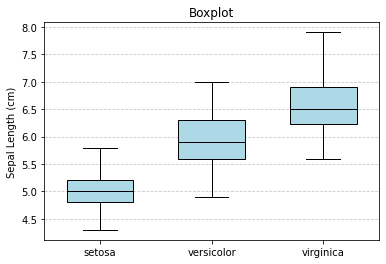

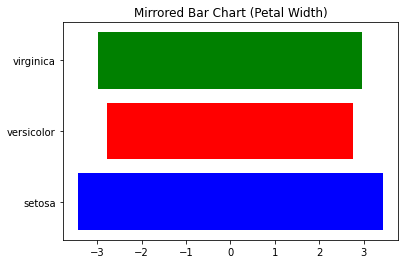

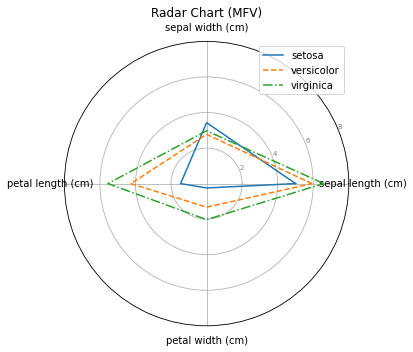

In [17]:
# 5. SYMMETRY GESTALT PRINCIPLE
# Code to illustrate three cases of the Symmetry Gestalt principle 
# Iris dataset of Fischer available at the Scikitlearn library

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

diris = load_iris()  # Load the Iris dataset from Scikitlearn

# Define box_color
box_color = 'lightblue'

# 1. Boxplot with symmetrically placed boxes around the median line
fig, axs = plt.subplots(figsize=(6, 4))
axs.boxplot([diris.data[diris.target == i, 0] for i in range(3)],
               sym='', widths=0.6, patch_artist=True,
               boxprops=dict(facecolor=box_color, edgecolor='black'),
               whiskerprops=dict(color='black', linestyle='-'),
               medianprops=dict(color='black'),
               capprops=dict(color='black', linestyle='-'))

axs.set_xticklabels(diris.target_names)
axs.set_ylabel('Sepal Length (cm)')
axs.set_title('Boxplot')
axs.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Mirrored bar chart with symmetrically arranged bars around the vertical axis
fig, axs = plt.subplots(figsize=(6, 4))
y_pos = np.arange(len(diris.target_names))
axs.barh(y_pos, [diris.data[diris.target==0, 1].mean(), diris.data[diris.target==1, 1].mean(), diris.data[diris.target==2, 1].mean()], align='center', color=['blue', 'red', 'green'])
axs.barh(y_pos, [-1*diris.data[diris.target==0, 1].mean(), -1*diris.data[diris.target==1, 1].mean(), -1*diris.data[diris.target==2, 1].mean()], align='center', color=['blue', 'red', 'green'])
axs.set_yticks(y_pos)
axs.set_yticklabels(diris.target_names)
axs.set_title('Mirrored Bar Chart (Petal Width)')

# 3. Radar chart with symmetrically arranged data points around the center point
fig = plt.figure(figsize=(15, 5))
axs = fig.add_subplot(polar=True)
angles = np.linspace(0, 2*np.pi, len(diris.feature_names), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
line = ['-','--','-.']
for i in range(3):
    values = diris.data[diris.target==i].mean(axis=0)
    values = np.concatenate((values,[values[0]]))
    axs.plot(angles, values, label=diris.target_names[i], ls=line[i])
plt.xticks(angles[:-1], diris.feature_names)
plt.yticks([2, 4, 6, 8], ["2", "4", "6", "8"], color="grey", size=7)
axs.legend()
axs.set_title('Radar Chart (MFV)')

# Display the plot
plt.tight_layout()
plt.show()

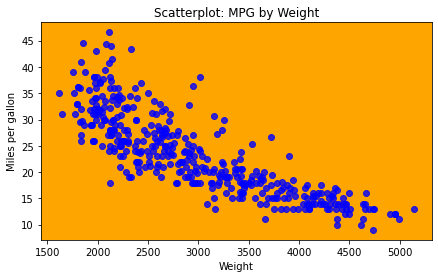

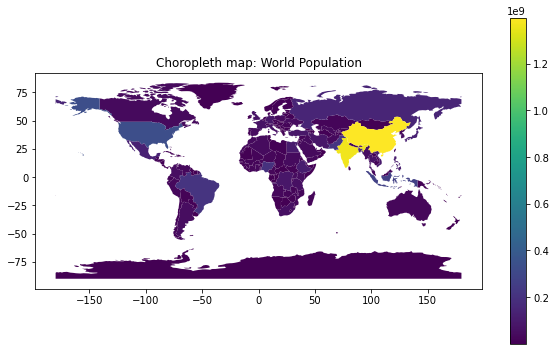

In [18]:
# 6. FIGURE-GROUND GESTALT PRINCIPLE
# Code to illustrate three cases of the Figure-ground Gestalt principle 
# Car dataset available at UCI and in mwaskom Github

import geopandas as gpd
import plotly.express as px

# Load the auto-mpg dataset
# https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/
# Also available at: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv
cars = pd.read_csv('mpg.csv')

# 1. Scatterplot with colored background
fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(cars['weight'], cars['mpg'], c='blue', alpha=0.8)
ax.set_facecolor('#FFA500')  # '#F2F3F4'
ax.set_xlabel('Weight')
ax.set_ylabel('Miles per gallon')
ax.set_title('Scatterplot: MPG by Weight')
plt.show()

# 2. Bubble chart
# Load the Gapminder dataset
data_url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
dgapminder = pd.read_csv(data_url)
year = 2007  # Filter the data for a specific year
df_year = dgapminder[dgapminder['year'] == year]
fig = px.scatter(df_year, x='gdpPercap', y='lifeExp', size='pop', color='continent',
                 log_x=True, hover_name='country', labels={'gdpPercap': 'GDP per capita (USD)', 
                                                           'lifeExp': 'Life expectancy (years)'},
                width=650, height=380)
fig.update_layout(plot_bgcolor='rgba(240,240,240,0.7)')
fig.show()

# 3. Choropleth map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(column='pop_est', legend=True, figsize=(10, 6))
plt.title('Choropleth map: World Population')
plt.show()

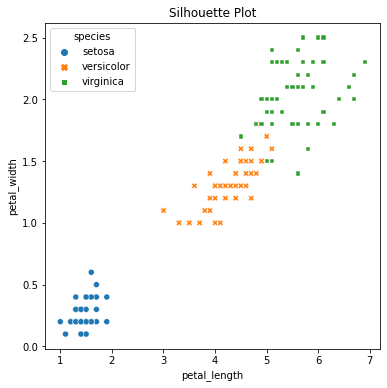

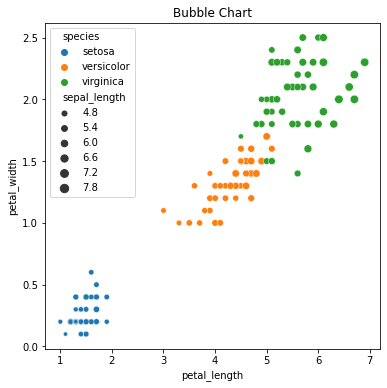

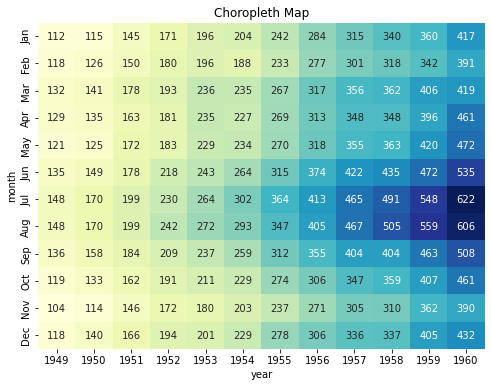

In [19]:
# 6. (BONUS) FIGURE-GROUND GESTALT PRINCIPLE
# Another code to illustrate three cases of the Figure-ground Gestalt principle 
# Iris dataset of Fischer and the Flights dataset in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = sns.load_dataset('iris')

# 1. Silhouette plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species', style='species')
plt.title('Silhouette Plot')

# 2. Bubble chart
plt.figure(figsize=(6, 6))
sns.scatterplot(x='petal_length', y='petal_width', data=iris, size='sepal_length', hue='species')
plt.title('Bubble Chart')

# 3. Choropleth map
flights = sns.load_dataset('flights').pivot('month', 'year', 'passengers')
plt.figure(figsize=(8, 6))
sns.heatmap(flights, cmap='YlGnBu', annot=True, fmt='d', cbar=False)
plt.title('Choropleth Map')

plt.show()

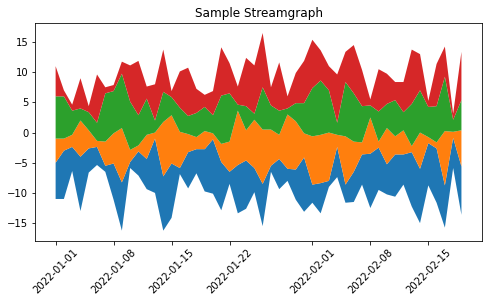

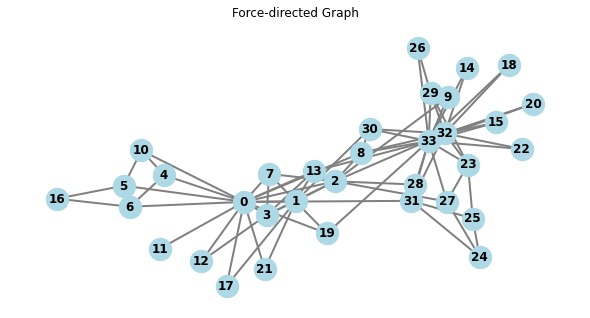

In [20]:
# 7. COMMON FATE GESTALT PRINCIPLE
# Code to illustrate three cases of the Common Fate Gestalt principle 
# Gapminder dataset available at UCI and the Karate Club data in Networkx

import pandas as pd
import numpy as np
import plotly.express as px  # Include Plotly Express
import matplotlib.pyplot as plt
import networkx as nx  # Include NetworkX

# 1. Motion chart using the Gapminder dataset
dgapminder = px.data.gapminder()
fig = px.scatter(dgapminder, x="gdpPercap", y="lifeExp", animation_frame="year", 
                 size="pop", color="continent", hover_name="country",
                 log_x=True, range_x=[100,100000], range_y=[20,90],
                 labels=dict(gdpPercap="GDP per capita", lifeExp="Life expectancy"),
                width=550, height=380)
fig.show()

# 2. Streamgraph with randomly generated data
dates = pd.date_range('20220101', periods=50)  # Create sample data
values = np.random.randint(1, 10, size=(50, 4))
df = pd.DataFrame(values, index=dates, columns=['A', 'B', 'C', 'D'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.stackplot(df.index, df.values.T, baseline='wiggle', labels=df.columns)
plt.xticks(rotation=45)  # Adjust the angle as needed
plt.title('Sample Streamgraph')
plt.show()

# 3. Force-directed graph using the Karate Club Graph data
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
plt.figure(figsize=(8,4))
nx.draw(G, pos, node_color='lightblue', node_size=500, 
        with_labels=True, font_size=12, font_weight='bold',
        width=2, edge_color='grey')
plt.title('Force-directed Graph')
plt.show()
